# Probability Distributions


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

### Problem 1
1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?
What is the probability that 3 or more cars come through the drive through?
How likely is it that the drive through gets at least 1 car?

<BarContainer object of 10 artists>

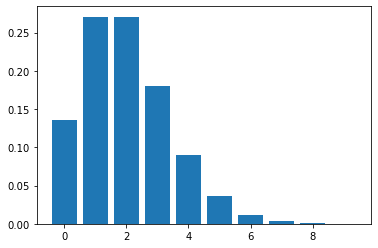

In [4]:
λ = 2 #cars during noon hour
stats.poisson(λ)
# y axis is p(x) x axis is number of cars per hour
x = np.arange(0, 10)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)


In [6]:
# What is the probability that no cars drive up in the noon hour?
stats.poisson(λ).pmf(0)


0.1353352832366127

In [7]:
# What is the probability that 3 or more cars come through the drive through? 
stats.poisson(λ).sf(3)

0.14287653950145296

In [8]:
# How likely is it that the drive through gets at least 1 car?
stats.poisson(λ).sf(1)

0.5939941502901616

### Problem 2
2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?

What GPA constitutes the bottom 15% of the class?

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
Determine the range of the third decile. 

Would a student with a 2.8 grade point average qualify for this scholarship?


If I have a GPA of 3.5, what percentile am I in?

In [10]:
#normal distribution
mean = 3
std_dev = 0.3
gradesdis = stats.norm(mean, std_dev)

In [11]:
#What grade point average is required to be in the top 5% of the graduating class?
# 3.49

gradesdis.isf(.05)

3.4934560880854417

In [15]:
# What GPA constitutes the bottom 15% of the class?
# 2.69

gradesdis.ppf(.15)

2.689069983151863

In [23]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class
# Determine the range of the third decile. bottom 20 - 29 percent

# 0.095 is the range 
# between 2.84 and 2.75

print(gradesdis.ppf(.3).round(2))
print(gradesdis.ppf(.2).round(2))
gradesdis.ppf(.3) - gradesdis.ppf(.2)

# Would a student with a 2.8 grade point average qualify for this scholarship?
# YES



2.84
2.75


0.0951662162594622

In [25]:
# If I have a GPA of 3.5, what percentile am I in?
# the 95th percentile

gradesdis.cdf(3.5)

0.9522096477271853

3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [26]:
λ = .02
click_thru = stats.poisson(λ)
click_thru.pdf()

In [27]:
97/4326

0.022422561257512713

In [34]:
clickthru_rate = .02
n_people = 4326
data = stats.binom(n_people, clickthru_rate)

# 97-1 because sf is not inclusive
data.sf(97-1)

#probability of 97 people clicking through is 13.98%

0.1397582363130086

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [39]:
possible_answers = 101
p_correct = 1/100

test = stats.binom(100, p_correct)

In [43]:
test.cdf(60)
# 99.99 % that you'll get one of those correct

0.9999999999999999

5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?



In [45]:
# binomial, it gets cleaned up or it doesnt
total_students = 66 * .9
chance = .03

break_room = stats.binom(total_students, chance)

In [58]:
1 - break_room.pmf(0)

0.8362274861228872

In [61]:
break_room.sf(0)
p_gets_cleaned = break_room.sf(0)

In [72]:
p_not_cleaned = 1 - p_gets_cleaned
p_not_cleaned

0.16578007115626447

In [70]:
p_not_cleaned ** 2

0.027483031992576113

In [71]:
p_not_cleaned ** 5

0.0001252165138809122

<BarContainer object of 15 artists>

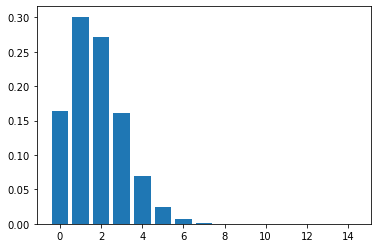

In [56]:
x = np.arange(0,15)
y = break_room.pmf(x)

plt.bar(x,y)

6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [ ]:
mean = 15
std_dev = 3
min_to_order = 2
time_to_food = 10

#y axis probablity of having time left, x axis minutes it takes to get lunch 
# (maybe you can alter to be minutes left in lunch break)

time_per_person = 1 * 2 #min to order



In [92]:
mean_time = 15 * 2
std_dev = 3 * 2
max_wait_time = 60 - 15 - 10 - 2

line_data = stats.norm(mean_time, std_dev)

Text(0, 0.5, 'probability')

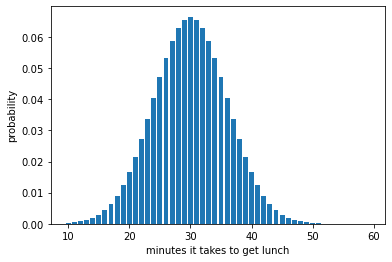

In [88]:
# plot to vizualize 
x = range(10,60)
y = line_data.pdf(x)

plt.bar(x,y)
plt.xlabel("minutes it takes to get lunch")
plt.ylabel("probability")

In [93]:
#get probability of under 35 min so you have 15 min left (10 min to get food)
line_data.cdf(max_wait_time)

0.6914624612740131

#### You have a 69.1% chance of getting your food with 15 min left to spare

7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

- What percent of employees earn less than 60,000?
- What percent of employees earn more than 95,000?
- What percent of employees earn between 65,000 and 80,000?
- What do the top 5% of employees make?

In [89]:
def get_db_url(user, host, password, db_name):
    """
    Order is important!! make sure you enter user, host, password, and then the name of the database you want to access
    """
    url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    return url

In [90]:
from env import host, user, password
db_name = 'employees'
url = get_db_url(user, host, password, db_name)

In [91]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [94]:
#pull table of current salaries from employees database
salaries = pd.read_sql("SELECT * FROM salaries WHERE to_date LIKE '%9999%'", url)

In [109]:
salaries.max()

emp_no           499999
salary           158220
from_date    2002-08-01
to_date      9999-01-01
dtype: object

In [115]:
salaries.describe()

,emp_no,salary
count,240124.000000,240124.000000
mean,253080.615365,72012.235857
std,161853.087323,17309.995380
min,10001.000000,38623.000000
25%,84878.750000,59048.750000
50%,249792.500000,69805.000000
75%,424895.250000,82546.000000
max,499999.000000,158220.000000


In [118]:
# first pull out mean salary and standard deviation of salary
mean_salary = salaries['salary'].mean()
stddev_salary = salaries['salary'].std()

In [123]:
# create scipy stat thingy
salary_stats = stats.norm(mean_salary, stddev_salary)

- What percent of employees earn less than 60,000?
    - 24.39%

In [124]:
# use .cdf to find percentage of people all below the 60,000 salary mark
salary_stats.cdf(60000)

0.24385742480214423

- What percent of employees earn more than 95,000?
    - 9.2%

In [125]:
# use sf. remember NOT inclusive. fits with question, percent of employees MORE than 95000
salary_stats.sf(95000)

0.09208819199804053

- What percent of employees earn between 65,000 and 80,000?
    - 33.5% 

In [126]:
# subtract percent area under 80,000 employees from percent under 64,999 (because cdf is inclusive)
# this leaves just the section between 65,000 and 80,000
salary_stats.cdf(80000) - salary_stats.cdf(64999)

0.33508179968418816

- What do the top 5% of employees make?
    - between 100,484.64  and  158,220.00

In [130]:
salary_stats.ppf(.95).round(2)

100484.64

In [136]:
salaries.salary.max()

158220